In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
script_dir = os.getcwd()
file_path = os.path.join(script_dir, "..", "JSONS", "all_matches.json")
all_rows = []

In [3]:
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

for team_name, matches in data.items():
    for match in matches:
        try:
            metadata = match.get("metadata", {})
            info = match.get("info", {})
            timestamp = info.get("gameCreation")
            participants = info.get("participants", [])
            challenges = [participant.get("challenges", {}) for participant in participants]

            for player, challenge in zip(participants, challenges):
                row = {
                    "file": os.path.basename(file_path),
                    "timestamp": timestamp,

                    # Player Identifiers
                    "summonerName": player.get("summonerName"), #No entry in summonerName
                    "participantId": player.get("participantId"),
                    "puuid": player.get("puuid"),
                    "championId": player.get("championId"),
                    "teamId": player.get("teamId"),
                    "individualPosition": player.get("individualPosition"),

                    # Core Game Statistics
                    "assists": player.get("assists"),
                    "kills": player.get("kills"),
                    "deaths": player.get("deaths"),
                    "champLevel": player.get("champLevel"),
                    "goldEarned": player.get("goldEarned"),
                    "totalMinionsKilled": player.get("totalMinionsKilled"),
                    "neutralMinionsKilled": player.get("neutralMinionsKilled"),
                    "visionScore": player.get("visionScore"),
                    "wardsPlaced": player.get("wardsPlaced"),
                    "detectorWardsPlaced": player.get("detectorWardsPlaced"),  # Control Wards
                    "wardsKilled": player.get("wardsKilled"),
                    "totalHeal": player.get("totalHeal"),
                    "totalDamageDealt": player.get("totalDamageDealt"),
                    "totalDamageDealtToChampions": player.get("totalDamageDealtToChampions"),
                    "magicDamageDealtToChampions": player.get("magicDamageDealtToChampions"),
                    "physicalDamageDealtToChampions": player.get("physicalDamageDealtToChampions"),
                    "trueDamageDealtToChampions": player.get("trueDamageDealtToChampions"),
                    "totalDamageTaken": player.get("totalDamageTaken"),
                    "damageSelfMitigated": player.get("damageSelfMitigated"),
                    "damageDealtToObjectives": player.get("damageDealtToObjectives"),
                    "damageDealtToTurrets": player.get("damageDealtToTurrets"),
                    "turretKills": player.get("turretKills"),
                    "turretTakedowns": player.get("turretTakedowns"),
                    "inhibitorKills": player.get("inhibitorKills"),
                    "inhibitorTakedowns": player.get("inhibitorTakedowns"),
                    "win": player.get("win"),
                    "timePlayed": player.get("timePlayed"),  # In seconds
                    "tier": player.get("tier"),
                    "rank": player.get("rank"),
                    "LP": player.get("leaguePoints"),

                    # Feats and Multi-kills
                    "firstBloodKill": player.get("firstBloodKill"),
                    "firstBloodAssist": player.get("firstBloodAssist"),
                    "firstTowerKill": player.get("firstTowerKill"),
                    "firstTowerAssist": player.get("firstTowerAssist"),
                    "killingSprees": player.get("killingSprees"),
                    "largestKillingSpree": player.get("largestKillingSpree"),
                    "largestMultiKill": player.get("largestMultiKill"),
                    "doubleKills": player.get("doubleKills"),
                    "tripleKills": player.get("tripleKills"),
                    "quadraKills": player.get("quadraKills"),
                    "pentaKills": player.get("pentaKills"),
                    "unrealKills": player.get("unrealKills"),

                    # Other stats
                    "itemsPurchased": player.get("itemsPurchased"),
                    "longestTimeSpentLiving": player.get("longestTimeSpentLiving"),
                    "visionWardsBoughtInGame": player.get("visionWardsBoughtInGame"),
                    "consumablesPurchased": player.get("consumablesPurchased"),
                    "spell1Casts": player.get("spell1Casts"),
                    "spell2Casts": player.get("spell2Casts"),
                    "spell3Casts": player.get("spell3Casts"),
                    "spell4Casts": player.get("spell4Casts"),
                    "summoner1Casts": player.get("summoner1Casts"),
                    "summoner2Casts": player.get("summoner2Casts"),
                }
                row.update(challenge) #Add every feature in challanges
                all_rows.append(row)

        except KeyError as e:
            print(f"Error {e} in {file_path}")
        except Exception as e:
            print(f"Error {e}")

df = pd.DataFrame(all_rows)

df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')

df = df.sort_values(by=["timestamp"], ascending=True)

display(df.tail())

,file,timestamp,summonerName,participantId,puuid,championId,teamId,individualPosition,assists,kills,...,highestCrowdControlScore,firstTurretKilledTime,shortestTimeToAceFromFirstTakedown,earliestDragonTakedown,highestChampionDamage,highestWardKills,fastestLegendary,fasterSupportQuestCompletion,baronBuffGoldAdvantageOverThreshold,earliestBaron
52,all_matches.json,2025-05-14 10:19:53.884,,3,WM7VdjHQ7IuF6Tfr_BccqY7fE04dgJyPwbFpk2CfthcwRN...,92,100,MIDDLE,10,8,...,NaN,874.371679,NaN,NaN,NaN,NaN,1620.543139,NaN,NaN,NaN
51,all_matches.json,2025-05-14 10:19:53.884,,2,IdZUfrplcC6alIrNvxfgvzko8NgdxYObh8bTztKK8EUX4w...,78,100,JUNGLE,15,13,...,1.0,874.371679,44.446685,1263.634065,NaN,NaN,NaN,NaN,NaN,NaN
50,all_matches.json,2025-05-14 10:19:53.884,,1,WjnapE6g9QOF0eV7mSByCbEhvbmWCw28ipiM3b1XZpD9qD...,68,100,TOP,4,6,...,NaN,874.371679,44.446685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,all_matches.json,2025-05-14 10:19:53.884,,9,wZ4Q6ERa2AxwHBNGvMc69G67g_Zld5xWtXIqY7R8Zq2Hln...,18,200,BOTTOM,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,all_matches.json,2025-05-14 10:19:53.884,,8,G-J0bcCtWKwX3NQcsrsnXOkdfxBYHKCrI_oCaLAkCT5Iew...,134,200,MIDDLE,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.isna().sum().sum())
#print(df.info)

1007


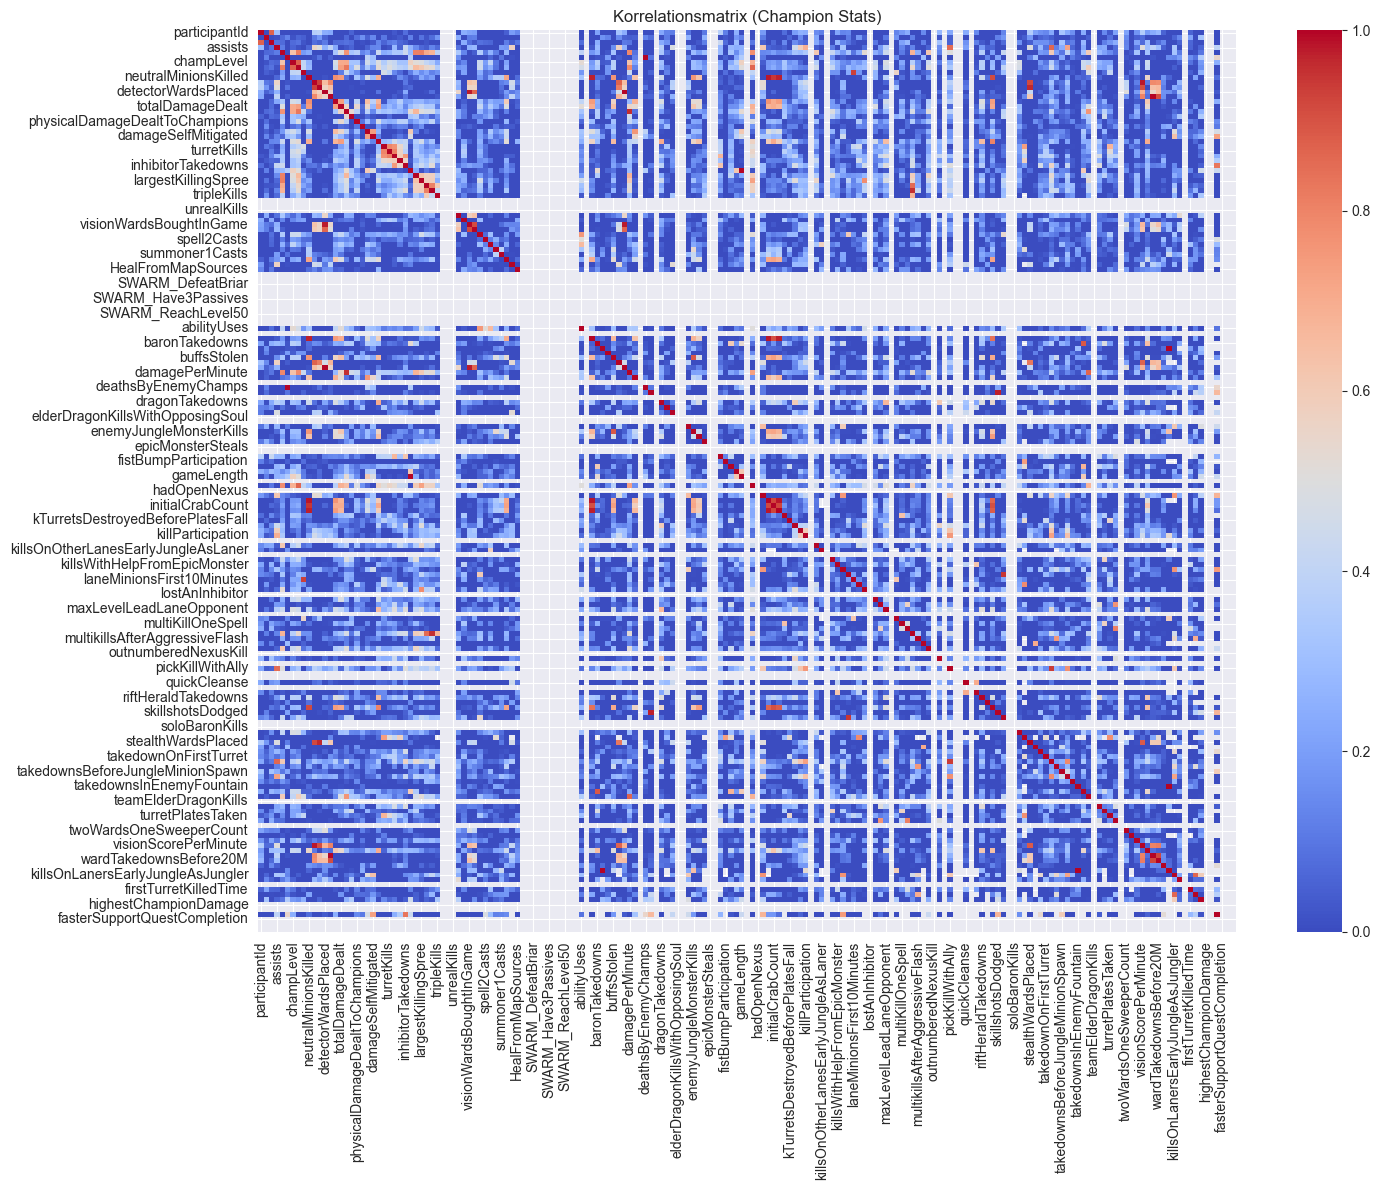

In [5]:
# Dropping non-numeric columns to compute the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
# correlation_matrix

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap="coolwarm",
            vmin=0,
            vmax=1,
            fmt=".3f",
            cbar=True
            )
plt.title("Korrelationsmatrix (Champion Stats)")
plt.tight_layout()
plt.show()


In [7]:
c_matrix = correlation_matrix.abs()
intervals = np.arange(0, 1.1, 0.1)
result = {round(i,1):[] for i in intervals}
result[1.1] = [] # NaN-Werte

cols = c_matrix.columns
n = len(cols)

for i in range(n):
    for j in range(i+1, n):
        v = c_matrix.iloc[i, j]
        if np.isnan(v):
            result[1.1].append((cols[i], cols[j]))
        else:
            bucket = round(np.floor(v * 10) / 10, 1)
            if v == 1.0:
                bucket = 1.0
            result[bucket].append((cols[i], cols[j]))

list_result = {k: v for k, v in result.items()}

with open('features_wertung.json', 'w', encoding='utf-8') as f:
    json.dump(list_result, f, ensure_ascii=False, indent=2)

In [ ]:
# somtin somthin

#Features
#DamageShare = teamDamagePercentage
#role = lane
#visionPerMinute = visionScorePerMinute
#kda = kda
#totaltimespentdead
#firstbloodkill
#turretplatestaken
#takedownsfirstxminutes
#firstblood
#kill-share
#dodgeSkillShotsSmallWindow
#outnumberedkills
#veteran / freshBlood
#hotStreak
#deathless = perfectgame
'''
longestTimeSpentLiving
quickCleanse
skillshotdogded
skillshotsHit
wardTakedownsBefore20M
gameEndedInEarlySurrender




'''


'''
heuristische Features
--> Game Length vs. Winrate --> viele Games mit kurzer Zeit (normale Low Elo sind 30-40 Min)
--> Account Level --> niedriges Level mit stark guten Stats
--> Rank Progression (von Iron zu Gold in unter <50 Spielen)
--> Durchschnittliches Gold vor 10 Minutes
--> Anteil der Spiele mit S-Rank (kann OTP sein)
--> Wie viele Perfekte Games (keine Tode)
--> durchschnittlicher CS-Lead zum Lane Opponent (maxCsAdvantageOnLaneOpponent)
--> hohe Vision Control
--> durchschnittliches Gold pro Minute bei Champ und Rolle
--> Zeit bis first full Item
--> Erster Level 6 bei 10+ Games im Durchschnitt
--> Winrate mit Off-Meta Champions (https://lolalytics.com/lol/tierlist/)
--> Anteil der Spiele mit über 20 Kills
--> Ragequits/AFK-Quote (Smurf AFKt nicht)
--> Keine frühen Aufgaben (earlysurrender gibt es nicht)
--> Durchschnittliche Tower Damage im Verhältnis zum Team
--> Durchschnittliche Anzahl an "Skillshots landed"
--> Durchschnittliche Objective Steals pro Spiel
--> Elo-Boosting (Drastische Veränderung der Account-Performance)
--> Champion Experience (Viele S-Ranks ohne Championmastery oder wenige Punkte) - champion-mastery-v4-api


Info
--> mind 10+ Games für Aussagekraft
--> immer Top 5% der Elo-Rangliste
-->

'''

New Features

In [8]:
#New Features
df["damagePerGold"] = df["totalDamageDealtToChampions"] / df["goldEarned"]
df["carryScore"] =  (df["kda"] * df["totalDamageDealtToChampions"] * df["goldEarned"]) /  (df["timePlayed"]/60)
df["efficiencyScore"] = df["kda"] * df["damagePerGold"] * df["visionScorePerMinute"]

tier_map = {
    "IRON": 1,
    "BRONZE": 2,
    "SILVER": 3,
    "GOLD": 4,
    "PLATINUM": 5,
    "EMERALD": 6,
    "DIAMOND": 7,
    "MASTER": 8,
    "GRANDMASTER": 9,
    "CHALLENGER": 10,
    "UNRANKED": 0
}

rank_map = {"IV": 1, "III": 2, "II": 3, "I": 4}

df["tier_num"] = df["tier"].map(tier_map)
df["rank_num"] = df["rank"].map(rank_map).fillna(0).astype(int)

df["tier_score"] = df["tier_num"] + df["rank_num"] + df["LP"]/100

df_ranked = df[df["tier_score"] > 0].copy() #Filter non ranked players

df_ranked["kda_tier"] = df_ranked["kda"] / df_ranked["tier_score"]

display(df_ranked["kda_tier"])

Series([], Name: kda_tier, dtype: object)